## Part 1


In [13]:
Probabilities = [0.967, 0.448, 0.568, 0.879, 0.015, 0.780, 0.978, 0.004]
Classifications = [1, 0, 1, 0, 1, 0, 1, 0]

sorted_probs = sorted(zip(Probabilities, Classifications), key=lambda x: x[0], reverse=True)


In [14]:
TPR = []
FPR = []
thresholds = []

for threshold in sorted_probs:
    threshold = threshold[0]
    TP = sum((p >= threshold and c == 1) for p, c in sorted_probs)
    FP = sum((p >= threshold and c == 0) for p, c in sorted_probs)
    TN = sum((p < threshold and c == 0) for p, c in sorted_probs)
    FN = sum((p < threshold and c == 1) for p, c in sorted_probs)
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)
    TPR.append(tpr)
    FPR.append(fpr)
    thresholds.append(threshold)


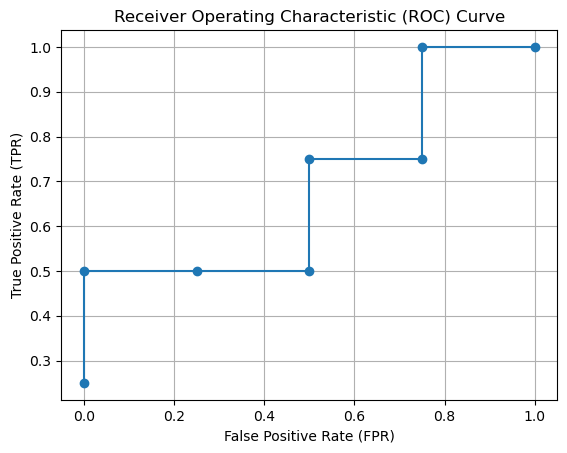

In [15]:
import matplotlib.pyplot as plt

plt.plot(FPR, TPR, marker='o')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.show()


## Part 2

In [16]:
import pandas as pd
file_path = 'EE627A_HW3_DataSet1.csv'
data = pd.read_csv(file_path)
data.head()


5.5986  5.5986.1   5.534  5.534.1  289.37  289.82   289.3  289.66  \
0  5.5340    5.5521  5.5108   5.5185  289.64  289.89  289.63  289.76   
1  5.5185    5.5185  5.4566   5.4772  289.86  290.07  289.65  289.93   
2  5.4772    5.4772  5.3894   5.3894  289.93  290.13  289.63  289.86   
3  5.3894    5.4152  5.3868   5.4152  289.85  290.03  289.45  289.51   
4  5.4101    5.4333  5.4101   5.4307  289.49  289.99  289.39  289.57   

   289.37.1  289.82.1  ...  21.206  41.042  42.338  41.042.1  42.108   2.133  \
0    289.64    289.89  ...  21.258  42.108  42.108    41.881  42.033  2.1175   
1    289.86    290.07  ...  21.268  42.033  42.261    41.804  41.881  2.1227   
2    289.93    290.13  ...  21.310  42.033  42.186    42.033  42.108  2.1227   
3    289.85    290.03  ...  21.310  42.108  42.186    42.033  42.108  2.0995   
4    289.49    289.99  ...  21.310  42.033  42.033    41.881  41.881  2.0995   

   2.1744  2.1175  2.1175.1  1  
0  2.1227  2.1175    2.1175  1  
1  2.1227  2.1124    2.1124  1  
2  2.1227  2.0995    2.0995  1  
3  2.0995  2.0943    2.0995  0  
4  2.0995  2.0891    2.0995  1  

[5 rows x 477 columns]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


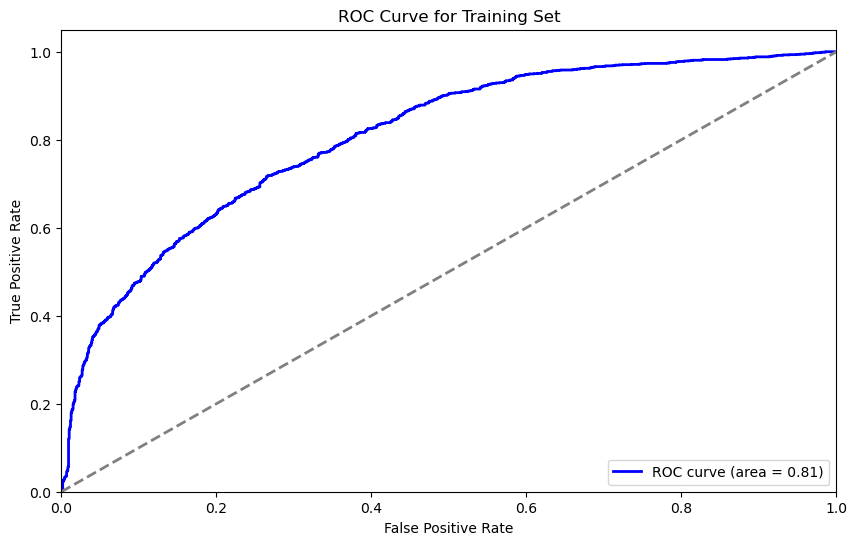

0.8064205658387325

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Splitting the dataset into predictors (X) and response (y)
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

# Splitting into training and validation sets based on row indices
X_train, X_validation = X.iloc[:3000], X.iloc[3000:]
y_train, y_validation = y.iloc[:3000], y.iloc[3000:]

# logistic regression(training set)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_train_pred_prob = logistic_model.predict_proba(X_train)[:, 1]

# Calculating ROC curve and AUC(training set)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
auc_train = auc(fpr_train, tpr_train)

# Plotting ROC curve (training set)
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_train)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set')
plt.legend(loc="lower right")
plt.show()

auc_train


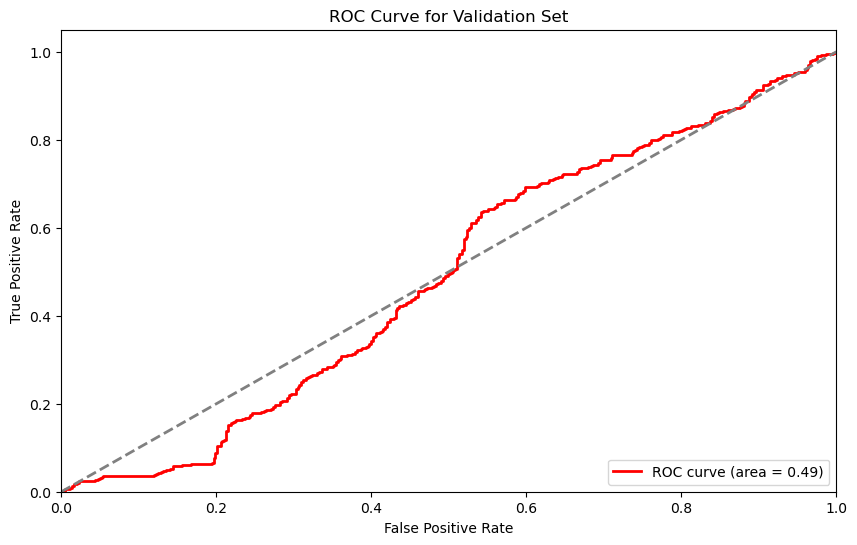

0.4909706546275395

In [18]:
# Predicting probabilities(validation set) 
y_validation_pred_prob = logistic_model.predict_proba(X_validation)[:, 1]

# Calculating ROC curve and AUC(validation set)
fpr_validation, tpr_validation, _ = roc_curve(y_validation, y_validation_pred_prob)
auc_validation = auc(fpr_validation, tpr_validation)

# Plotting ROC curve (validation set)
plt.figure(figsize=(10, 6))
plt.plot(fpr_validation, tpr_validation, color='red', lw=2, label='ROC curve (area = %0.2f)' % auc_validation)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Validation Set')
plt.legend(loc="lower right")
plt.show()

auc_validation


Plotted the ROC curve for the validation set, and the Area Under the Curve (AUC) came out to be around 0.49 for the validation set. This AUC value is way lesser than the value of AUC obtained for the training set, i.e., ~0.81. This huge difference of training AUC (0.81) and validation AUC (0.49) may lead to the thought that the logistic regression model is overfitting, learning noise from the training data, and it is not able to represent the general trend nicely from the testing/validation data.Overfitting happens when the model learns the overall pattern of the data and noise present in the data.